### Import libraries and cleaned data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
file_path = '/content/drive/My Drive/CLV_Data/processed_online_retail_II.csv'

In [9]:
df = pd.read_csv(file_path)

In [10]:
df.describe(include='all')
# The "top" row represents the most frequently occurring value.
# The "freq" value represents the frequency of the most common value ("top") within each column.

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Purchase
count,400947.000000,400947,400947,400947.000000,400947,400947.000000,400947.000000,400947,400947.000000
unique,NaN,4017,4444,NaN,18010,NaN,NaN,37,NaN
top,NaN,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2010-03-07 15:34:00,NaN,NaN,United Kingdom,NaN
freq,NaN,3107,3107,NaN,251,NaN,NaN,364255,NaN
mean,514730.974393,NaN,NaN,13.768523,NaN,3.305571,15361.454639,NaN,21.943633
std,14090.832712,NaN,NaN,97.639816,NaN,35.046376,1680.669487,NaN,77.755308
min,489434.000000,NaN,NaN,1.000000,NaN,0.000000,12346.000000,NaN,0.000000
25%,502751.000000,NaN,NaN,2.000000,NaN,1.250000,13985.000000,NaN,5.000000
50%,515192.000000,NaN,NaN,5.000000,NaN,1.950000,15311.000000,NaN,12.500000
75%,527065.000000,NaN,NaN,12.000000,NaN,3.750000,16805.000000,NaN,19.500000


### Investigating StockCode and Descriptions

In [11]:
filtered_df = df.groupby('StockCode').filter(lambda x: x['Description'].nunique() > 1)
filtered_df['StockCode'] = filtered_df['StockCode'].astype(str)
filtered_df.sort_values(by='StockCode')

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Purchase
162047,510498,15058B,PINK WHITE SPOTS GARDEN PARASOL,2,2010-06-01 12:42:00,7.95,14227.0,United Kingdom,15.9
150229,508972,15058B,PINK WHITE SPOTS GARDEN PARASOL,10,2010-05-19 11:39:00,3.95,15727.0,United Kingdom,39.5
154431,509437,15058B,PINK WHITE SPOTS GARDEN PARASOL,10,2010-05-23 15:21:00,3.95,12409.0,Switzerland,39.5
129556,506170,15058B,PINK WHITE SPOTS GARDEN PARASOL,2,2010-04-28 10:04:00,7.95,14237.0,United Kingdom,15.9
145928,508339,15058B,PINK WHITE SPOTS GARDEN PARASOL,2,2010-05-14 12:17:00,7.95,13873.0,United Kingdom,15.9
...,...,...,...,...,...,...,...,...,...
204386,515855,BANK CHARGES,Bank Charges,1,2010-07-15 11:24:00,15.00,17448.0,United Kingdom,15.0
111144,503960,BANK CHARGES,Bank Charges,1,2010-04-08 16:50:00,15.00,12843.0,United Kingdom,15.0
218808,517648,BANK CHARGES,Bank Charges,1,2010-07-30 13:52:00,15.00,14606.0,United Kingdom,15.0
379064,535474,BANK CHARGES,Bank Charges,1,2010-11-26 13:56:00,15.00,16928.0,United Kingdom,15.0


In [12]:
filtered_df[filtered_df['StockCode']== '15058B']['Description'].unique()

array(['PINK WHITE SPOTS GARDEN PARASOL', 'PINK POLKADOT GARDEN PARASOL'],
      dtype=object)

The number of unique Descriptions exceeds the number of unique StockCodes. Upon investigating, we noticed that some items are described differently despite having the same StockCode. Essentially, it is the same product but with paraphrased descriptions.

### Univariate Analysis of Features


#### Analyzing 'Quantity'

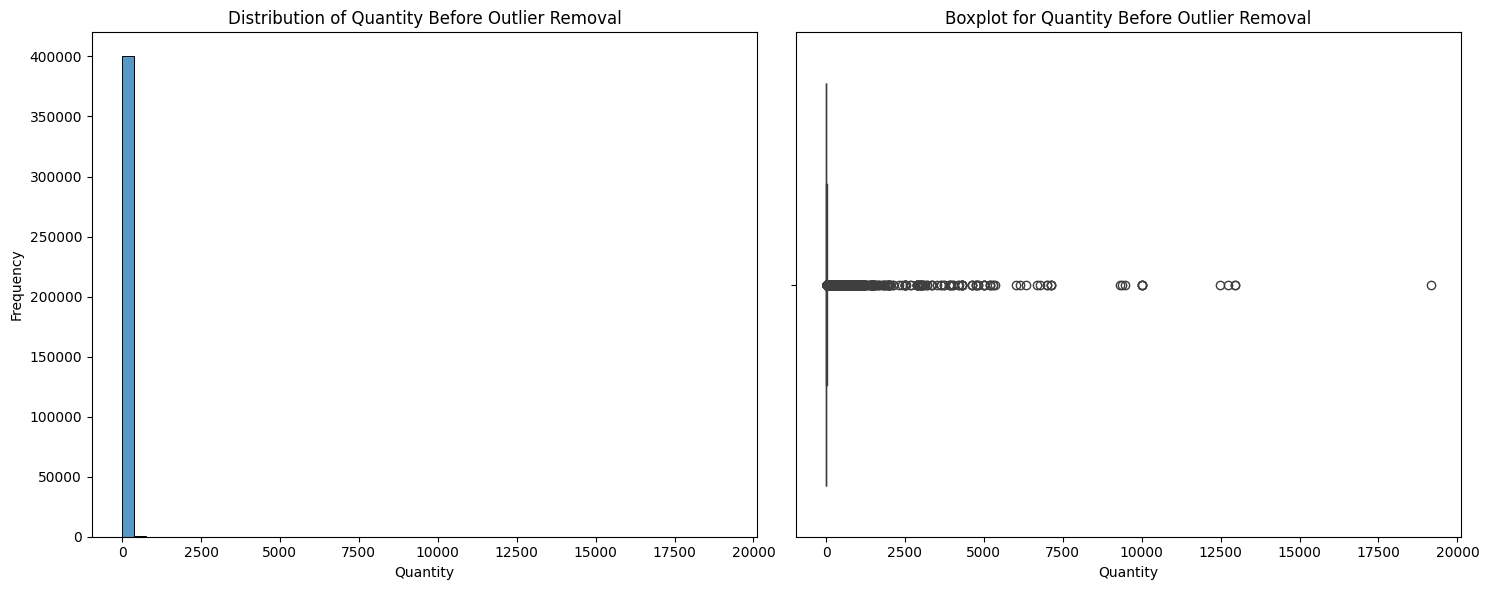

,Quantity
count,400947.000000
mean,13.768523
std,97.639816
min,1.000000
25%,2.000000
50%,5.000000
75%,12.000000
max,19152.000000


In [13]:
# Before Outlier Removal
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(df['Quantity'], bins=50, kde=False, ax=axes[0])
axes[0].set_title('Distribution of Quantity Before Outlier Removal')
axes[0].set_xlabel('Quantity')
axes[0].set_ylabel('Frequency')

sns.boxplot(x=df['Quantity'], ax=axes[1])
axes[1].set_title('Boxplot for Quantity Before Outlier Removal')
axes[1].set_xlabel('Quantity')

plt.tight_layout()
plt.show()

# Summary Statistics for Quantity Before Outlier Removal
df['Quantity'].describe()

Due to the presence of significant outliers, the visual representation of the data becomes less interpretable, obscuring the underlying distribution trends of the majority of data points.

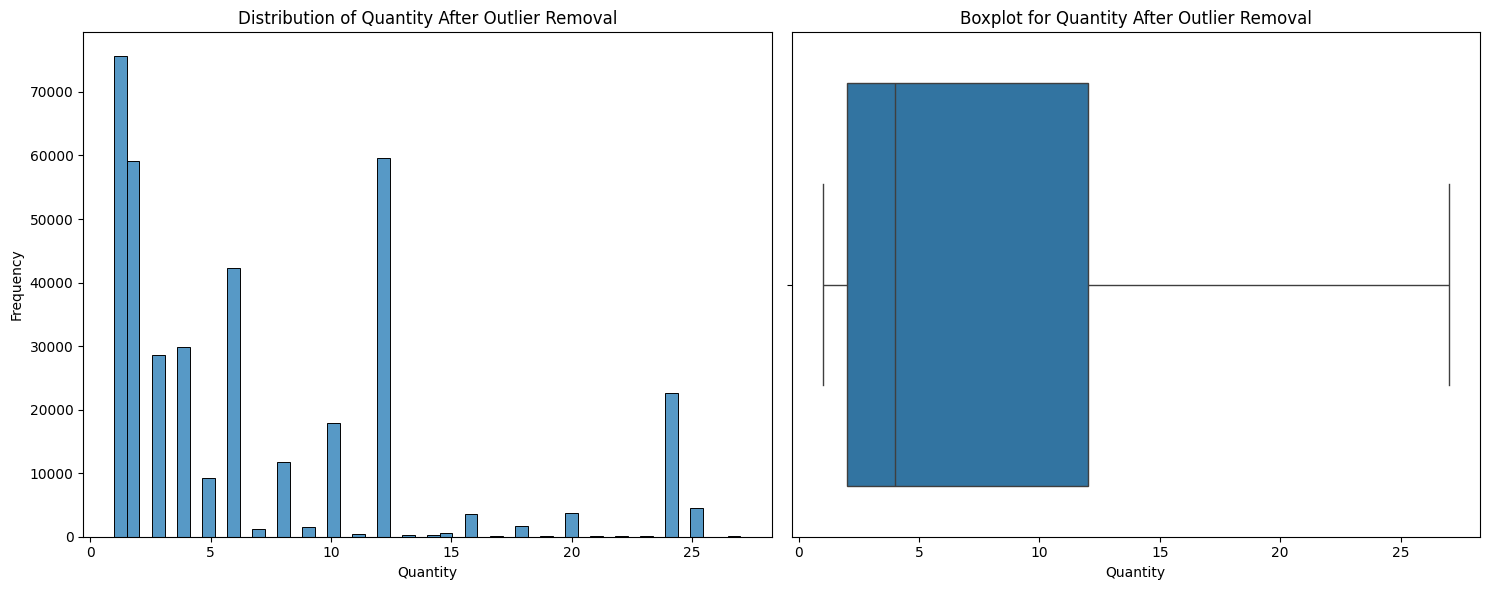

,Quantity
count,374651.000000
mean,6.821167
std,6.525519
min,1.000000
25%,2.000000
50%,4.000000
75%,12.000000
max,27.000000


In [14]:
# Outlier removal
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1

# Bounds for non-outlier data
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_df = df[(df['Quantity'] >= lower_bound) & (df['Quantity'] <= upper_bound)]

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(filtered_df['Quantity'], bins=50, kde=False, ax=axes[0])
axes[0].set_title('Distribution of Quantity After Outlier Removal')
axes[0].set_xlabel('Quantity')
axes[0].set_ylabel('Frequency')

sns.boxplot(x=filtered_df['Quantity'], ax=axes[1])
axes[1].set_title('Boxplot for Quantity After Outlier Removal')
axes[1].set_xlabel('Quantity')

plt.tight_layout()
plt.show()

# Summary Statistics for Quantity After Outlier Removal
filtered_df['Quantity'].describe()

- Frequency and Distribution: Most observations are concentrated between quantities of 0 to 5, with quantities ranging up to 27. The frequency diminishes as quantities increase, indicating a right-skewed distribution.
- Statistical Measures:
  - Mean and Median: The mean quantity is 6.82, higher than the median of 4, reflecting the skew towards lower values.
  - Interquartile Range (IQR): Spans from 2 to 12, capturing the middle 50% of the data, consistent with the boxplot's IQR.
-Data Characteristics: The maximum quantity of 27 suggests some higher values, but no extreme outliers, underscoring the dataset's overall trend towards lower quantities.

#### Analyzing 'Price'

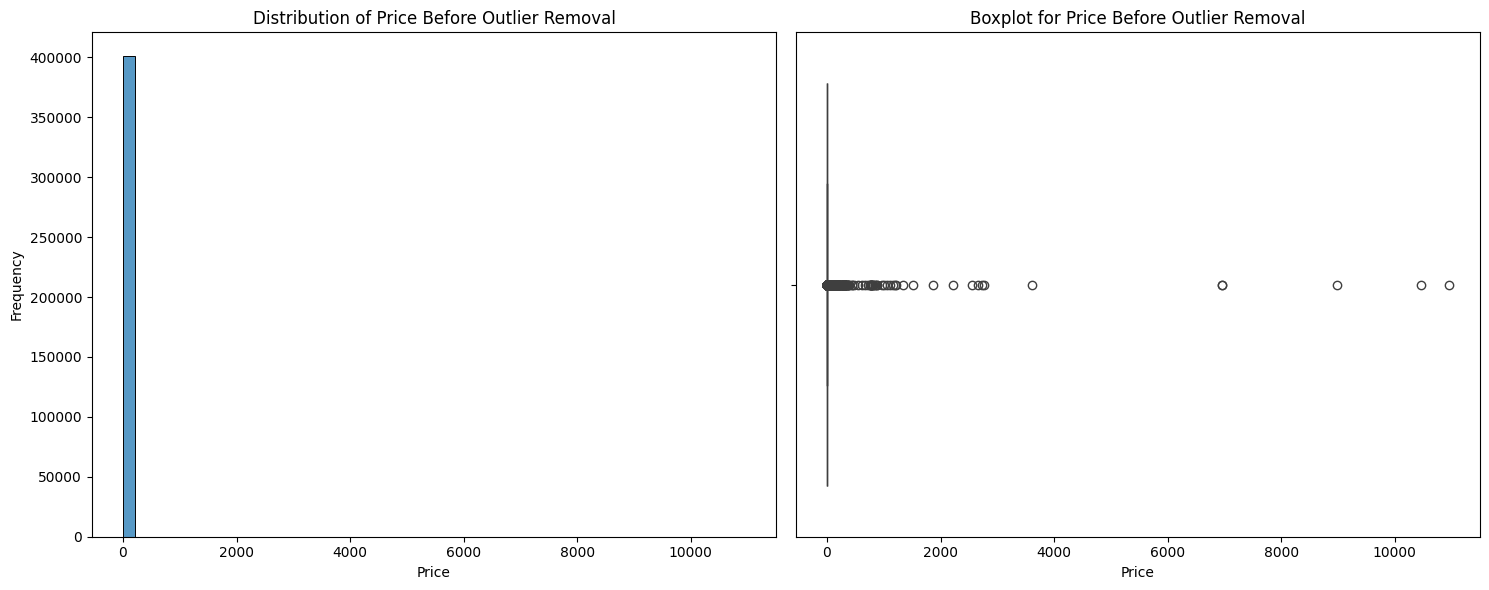

,Price
count,400947.000000
mean,3.305571
std,35.046376
min,0.000000
25%,1.250000
50%,1.950000
75%,3.750000
max,10953.500000


In [15]:
# Before Outlier Removal
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(df['Price'], bins=50, kde=False, ax=axes[0])
axes[0].set_title('Distribution of Price Before Outlier Removal')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')

sns.boxplot(x=df['Price'], ax=axes[1])
axes[1].set_title('Boxplot for Price Before Outlier Removal')
axes[1].set_xlabel('Price')

plt.tight_layout()
plt.show()

# Summary Statistics for Price Before Outlier Removal
df['Price'].describe()

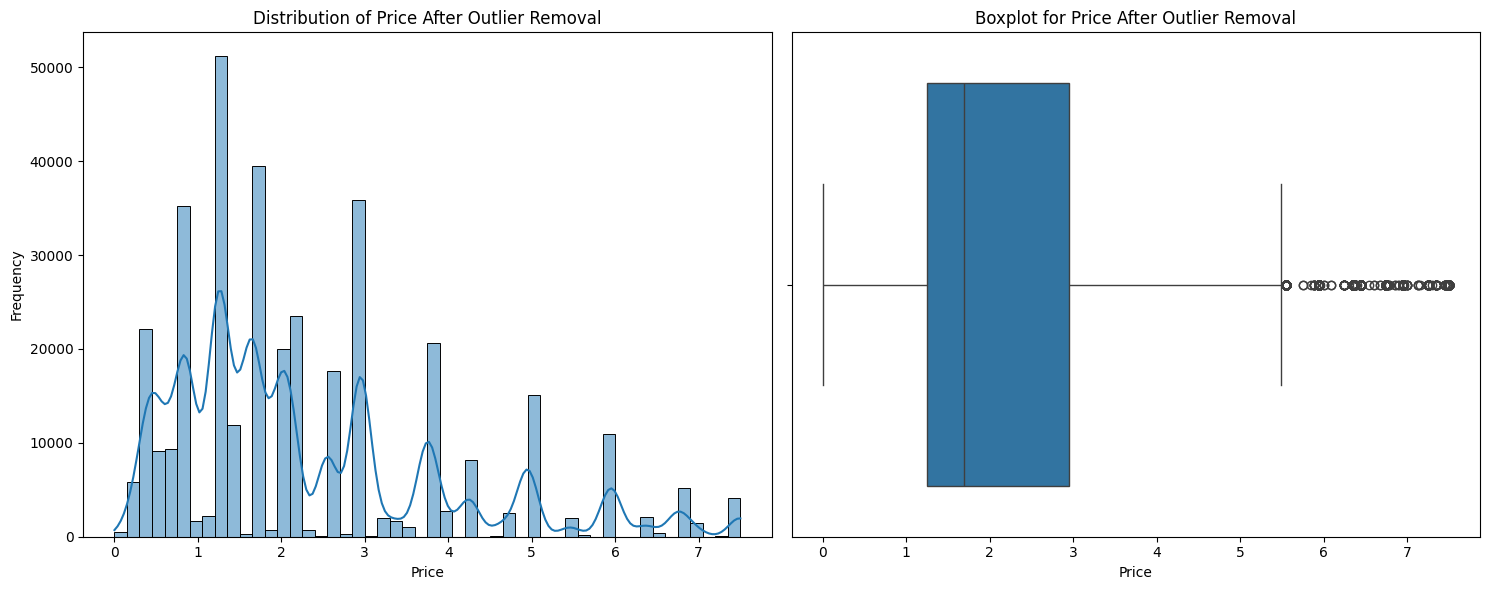

,Price
count,368324.000000
mean,2.284895
std,1.652152
min,0.000000
25%,1.250000
50%,1.690000
75%,2.950000
max,7.500000


In [16]:
# Outlier removal
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

# Bounds for non-outlier data
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_df = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(filtered_df['Price'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Price After Outlier Removal')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')

sns.boxplot(x=filtered_df['Price'], ax=axes[1])
axes[1].set_title('Boxplot for Price After Outlier Removal')
axes[1].set_xlabel('Price')

plt.tight_layout()
plt.show()

# Summary Statistics for Price After Outlier Removal
filtered_df['Price'].describe()

- Price Distribution Insights:
  - Multiple Peaks: The histogram shows multiple peaks, indicating popular price points likely due to psychological pricing strategies such as 0.99 or 1.99. Most items are priced below 3 units, emphasizing affordability.
  - Right-Skew and Central Range: The distribution is right-skewed with most prices concentrated at the lower end and a tail extending to higher prices. The boxplot reveals that the central 50% of prices range from 1.25 to 2.95 units, with a median of 1.69 units, highlighting the focus on lower-priced goods.
- Outliers:
  - Higher-Priced Items: Outliers up to 7.5 units suggest the presence of higher-priced items, indicating a pricing strategy that includes both budget-friendly options and premium products, catering to different consumer segments with a few premium options.
- Together, these visualizations and statistics suggest a varied pricing strategy with a strong emphasis on lower-priced goods, possibly using psychological pricing (e.g., pricing just below whole numbers) to enhance perceived value, while also offering a few premium options.

#### Analyzing 'StockCode'

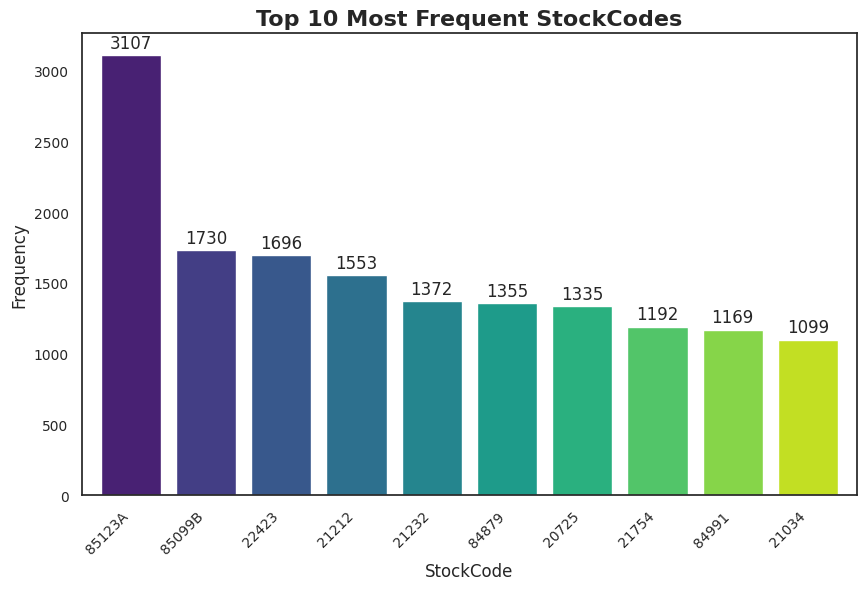

In [17]:
sns.set(style="white")

plt.figure(figsize=(10, 6))
ax = df['StockCode'].value_counts().head(10).plot(kind='bar', color=sns.color_palette("viridis", 10), width=0.8)

plt.title('Top 10 Most Frequent StockCodes', fontsize=16, fontweight='bold')
plt.xlabel('StockCode', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Adding value labels to each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.show()

In [18]:
top_stock_codes = df['StockCode'].value_counts().head(10).index.tolist()

In [19]:
top_stock_desc = df[df['StockCode'].isin(top_stock_codes)][['StockCode', 'Description']].drop_duplicates()
top_stock_desc['StockCode'] = pd.Categorical(top_stock_desc['StockCode'], categories=top_stock_codes, ordered=True)
top_stock_desc = top_stock_desc.sort_values('StockCode')

In [20]:
top_stock_desc

,StockCode,Description
102,85123A,WHITE HANGING HEART T-LIGHT HOLDER
161,85099B,JUMBO BAG RED WHITE SPOTTY
107248,85099B,RED RETROSPOT JUMBO BAG
146254,85099B,JUMBO BAG RED RETROSPOT
88353,22423,REGENCY CAKESTAND 3 TIER
224,21212,PACK OF 72 RETRO SPOT CAKE CASES
268868,21212,PACK OF 72 RETROSPOT CAKE CASES
4,21232,STRAWBERRY CERAMIC TRINKET BOX
15,84879,ASSORTED COLOUR BIRD ORNAMENT
166,20725,LUNCH BAG RED SPOTTY


- The top stock codes and their descriptions indicate which products are most frequently sold.
- "WHITE HANGING HEART T-LIGHT HOLDER" seems to be the most popular item.
- Some stock codes have multiple descriptions, indicating different variants or packaging of the same product. For instance, "850998" corresponds to different JUMBO BAG descriptions.
- The descriptions suggest a variety of product categories, including home decor (e.g., T-LIGHT HOLDER), kitchenware (e.g., CAKESTAND), and accessories (e.g., TRINKET BOX), which could indicate a broad customer base with varied interests or seasonal buying patterns.
- Overall, the data highlights the most popular products and their variants, providing valuable insights for inventory management, marketing strategies, and sales focus.

#### Analyzing 'Description'

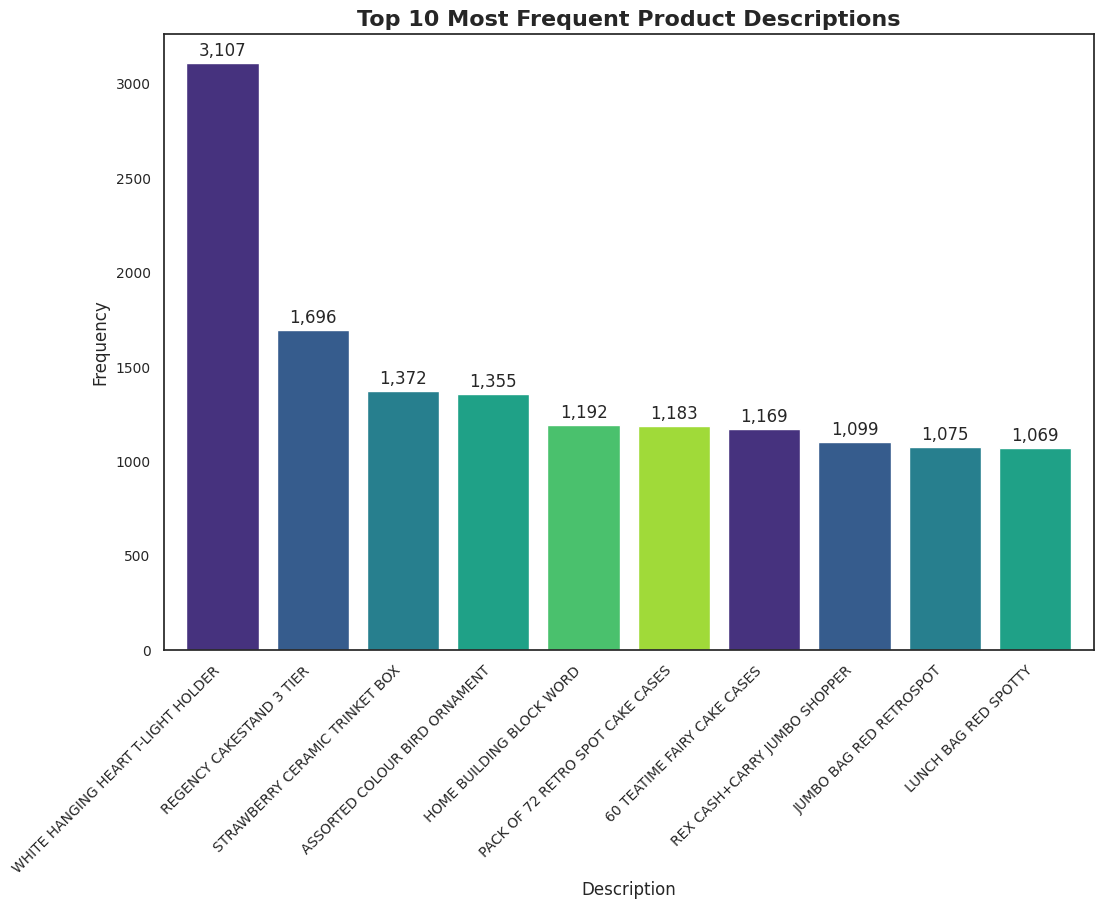

In [21]:
sns.set_palette("coolwarm")

plt.figure(figsize=(12, 8))
ax = df['Description'].value_counts().head(10).plot(kind='bar', color=sns.color_palette("viridis"), width=0.8)

plt.title('Top 10 Most Frequent Product Descriptions', fontsize=16, fontweight='bold')
plt.xlabel('Description', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

for p in ax.patches:
    ax.annotate(format(p.get_height(), ',.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.show()

- The ‘WHITE HANGING HEART T-LIGHT HOLDER’ stands out as the most popular item by a notable margin, indicating it’s a customer favorite or a key product.
- Ensuring these high-demand items are consistently well-stocked is essential to meet customer expectations and avoid shortages, which can impact satisfaction.
- Featuring these popular products in promotional campaigns or offering them as part of special deals can help attract more customers and drive sales.
- The success of these items suggests an opportunity to introduce similar products, potentially expanding the range and catering to proven consumer preferences.

- The differences in 'top' values for Stock Codes and Descriptions are due to a lack of standardization in catalog management, potentially leading to confusion in inventory tracking and customer purchases.

#### Analyzing 'Country'

<ipython-input-22-2c730fd8d341>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette=colors)


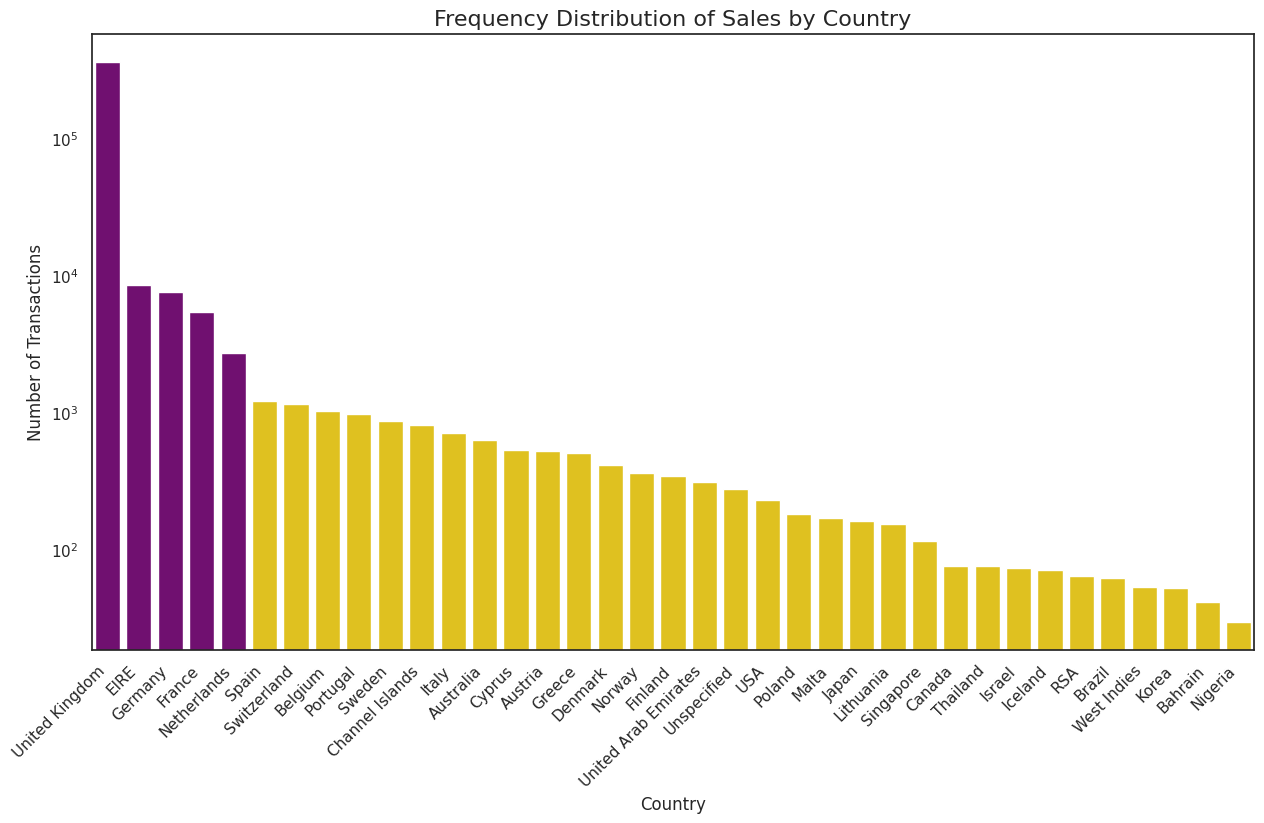

In [22]:
plt.figure(figsize=(15, 8))
country_counts = df['Country'].value_counts()

colors = ['purple' if x < 5 else 'gold' for x in range(len(country_counts))]

sns.barplot(x=country_counts.index, y=country_counts.values, palette=colors)
plt.title('Frequency Distribution of Sales by Country', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.yscale('log')
plt.xticks(rotation=45, ha='right')
plt.show()

From the logarithmic distribution of sales transactions across different countries, several insights can be derived:

- The United Kingdom appears to have the highest frequency of sales transactions by a significant margin. This suggests that the UK is the primary market for the business, indicating a strong customer base or brand presence in this region.
- Other regions like British Columbia, North America, and parts of Europe show moderate sales frequencies. This indicates varying levels of market presence and customer engagement across different regions.
- Countries in Asia Pacific, such as Japan, Indonesia, Korea, and Thailand, along with regions like South America and Africa (e.g., Nigeria), show lower sales frequencies. These could represent emerging markets with potential for growth. These regions could benefit from targeted marketing and expansion strategies to increase market share.
- The data suggests that the business should continue to focus on its stronghold in the UK while exploring strategies to boost sales in regions with lower transaction frequencies.

### Multivariate Analysis


#### Correlation Analysis

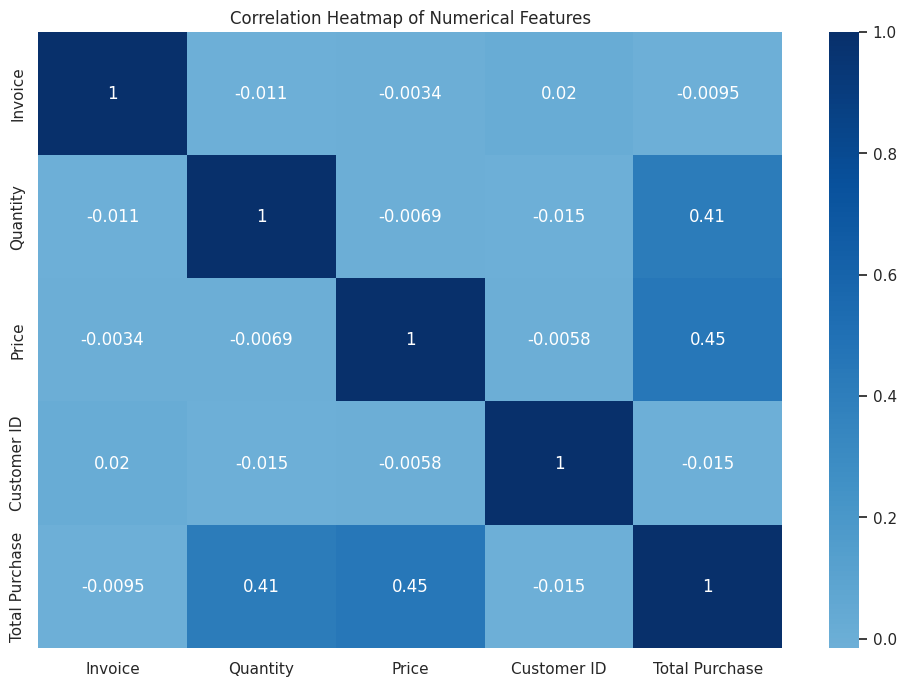

In [23]:
correlation_matrix = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

There is no correlation between the numeric variables of this dataset.

#### Top Countries by Sales

In [24]:
df['Total Purchase'] = df['Price'] * df['Quantity']

<ipython-input-25-9ce51fa788e5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_qty.index, y=country_qty.values, palette=palette)


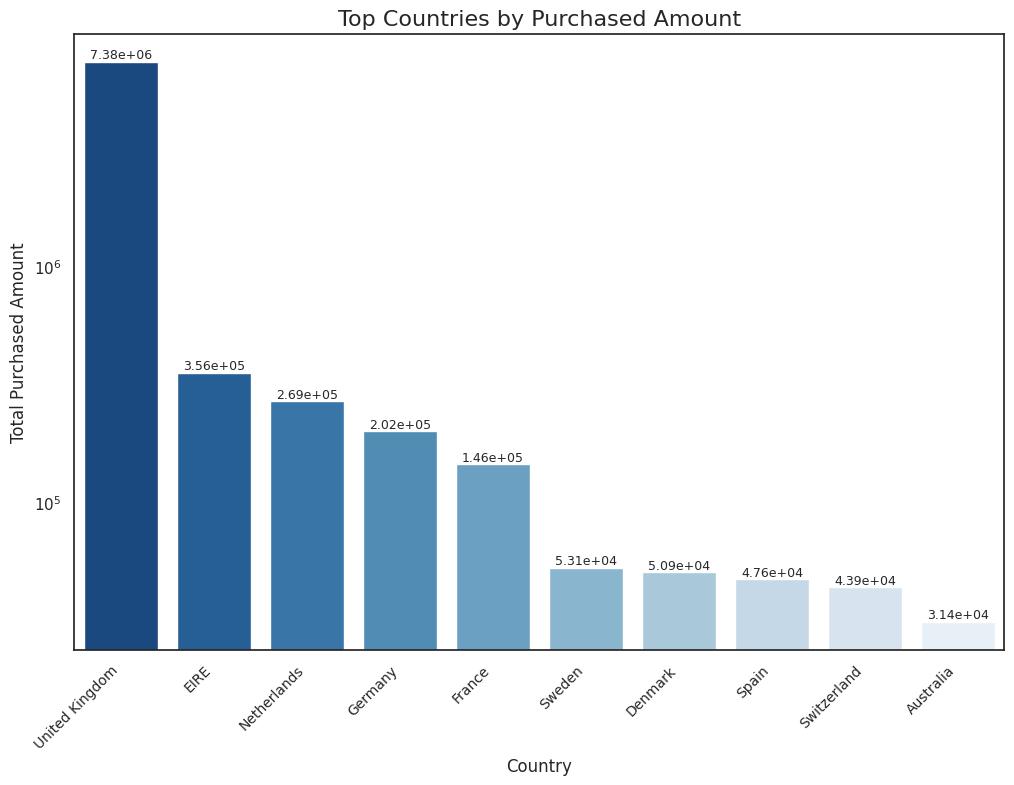

In [25]:
country_qty = df.groupby("Country")["Total Purchase"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
palette = sns.color_palette("Blues_r", len(country_qty))
sns.barplot(x=country_qty.index, y=country_qty.values, palette=palette)
plt.title('Top Countries by Purchased Amount', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Purchased Amount', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yscale('log')

for index, value in enumerate(country_qty):
    plt.text(index, value, f'{value:.2e}', ha='center', va='bottom', fontsize=9)

plt.show()

In [26]:
top_5_countries = ["United Kingdom", "EIRE", "Netherlands", "Germany", "France"]

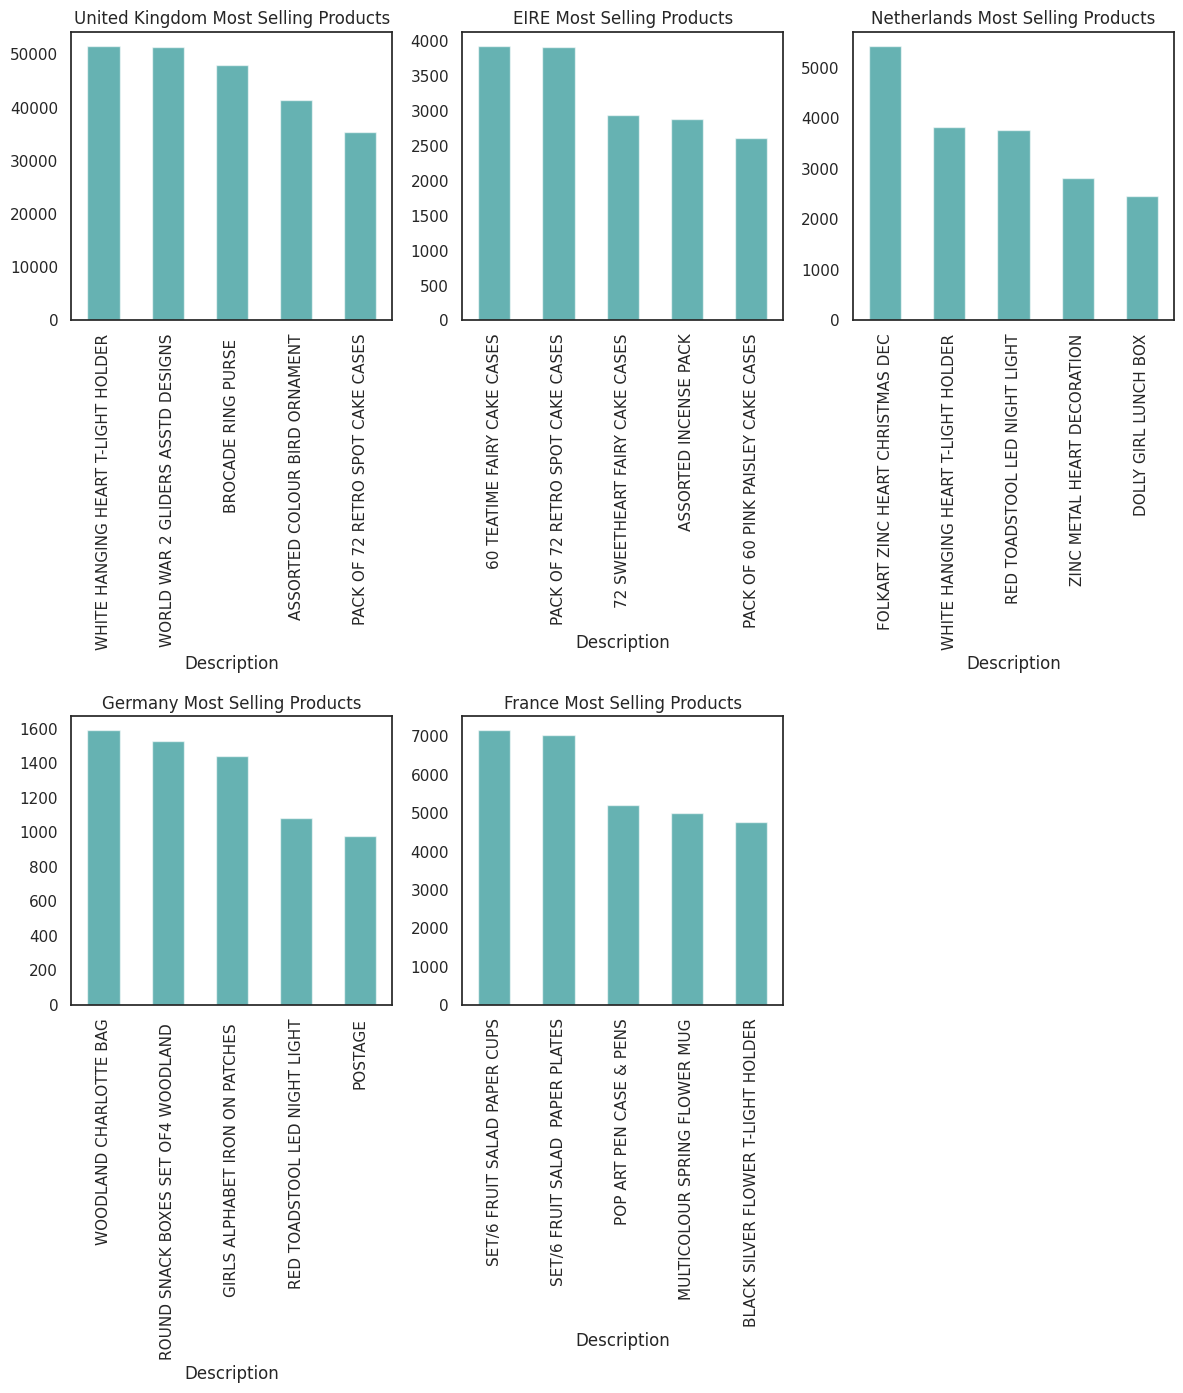

In [27]:
x = 1
plt.figure(figsize=(12,24))
for x, c in enumerate(top_5_countries):
    ax = plt.subplot(4,3, x+1)
    plt.title(c + ' '+ "Most Selling Products")
    top_products = df[df['Country'] == c].groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(5)
    top_products.plot(kind = "bar", ax = ax, color = "teal", alpha = 0.6)
    plt.tight_layout()

<ipython-input-28-2b1299d3a65b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=country_qty.index, y=country_qty.values, palette="Blues_d")


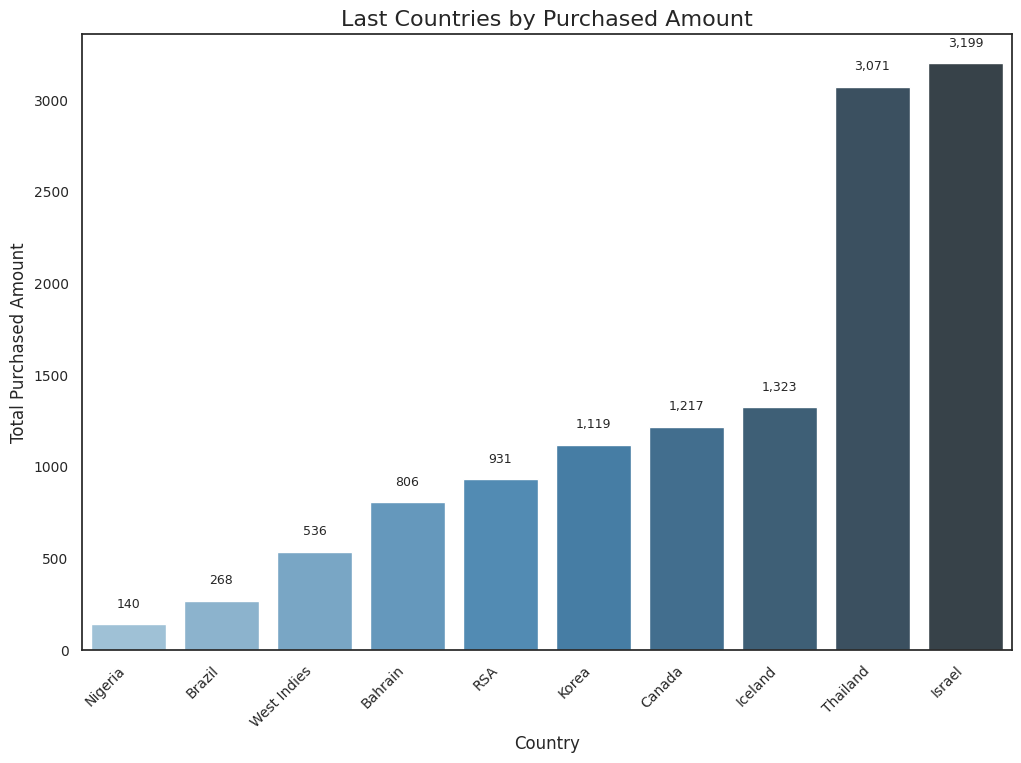

In [28]:
country_qty = df.groupby("Country")["Total Purchase"].sum().sort_values(ascending = True).head(10)

plt.figure(figsize=(12, 8))
ax = sns.barplot(x=country_qty.index, y=country_qty.values, palette="Blues_d")
plt.title('Last Countries by Purchased Amount', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Purchased Amount', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

for p in ax.patches:
    ax.annotate(format(p.get_height(), ',.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 10),
                textcoords='offset points', fontsize=9)

plt.show()

In [29]:
last_5_countries = ["Nigeria", "Brazil", "West Indies", "Bahrain", "RSA"]

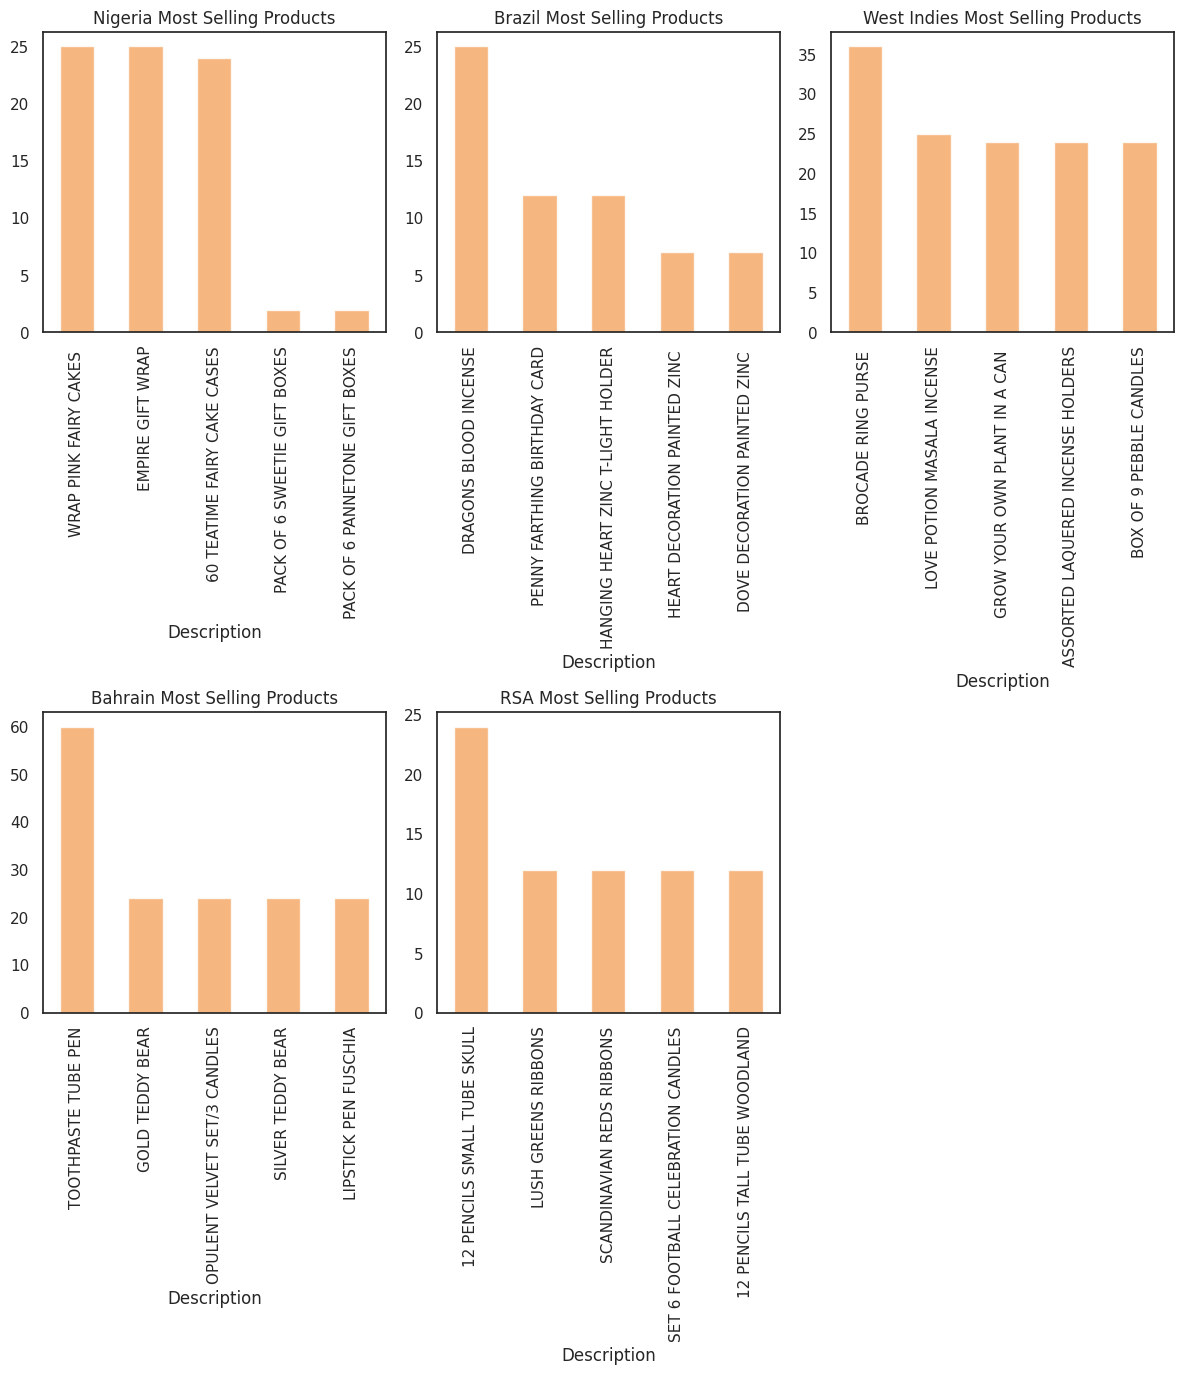

In [30]:
x = 1
plt.figure(figsize=(12,24))
for x, c in enumerate(last_5_countries):
    ax = plt.subplot(4,3, x+1)
    plt.title(c + ' '+ "Most Selling Products")
    top_products = df[df['Country'] == c].groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(5)
    top_products.plot(kind = "bar", ax = ax, color = "sandybrown", alpha = 0.8)
    plt.tight_layout()

#### Top-Selling Products

<ipython-input-31-f8d602fce1f3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_selling_products.index, y=top_selling_products.values, palette="viridis")


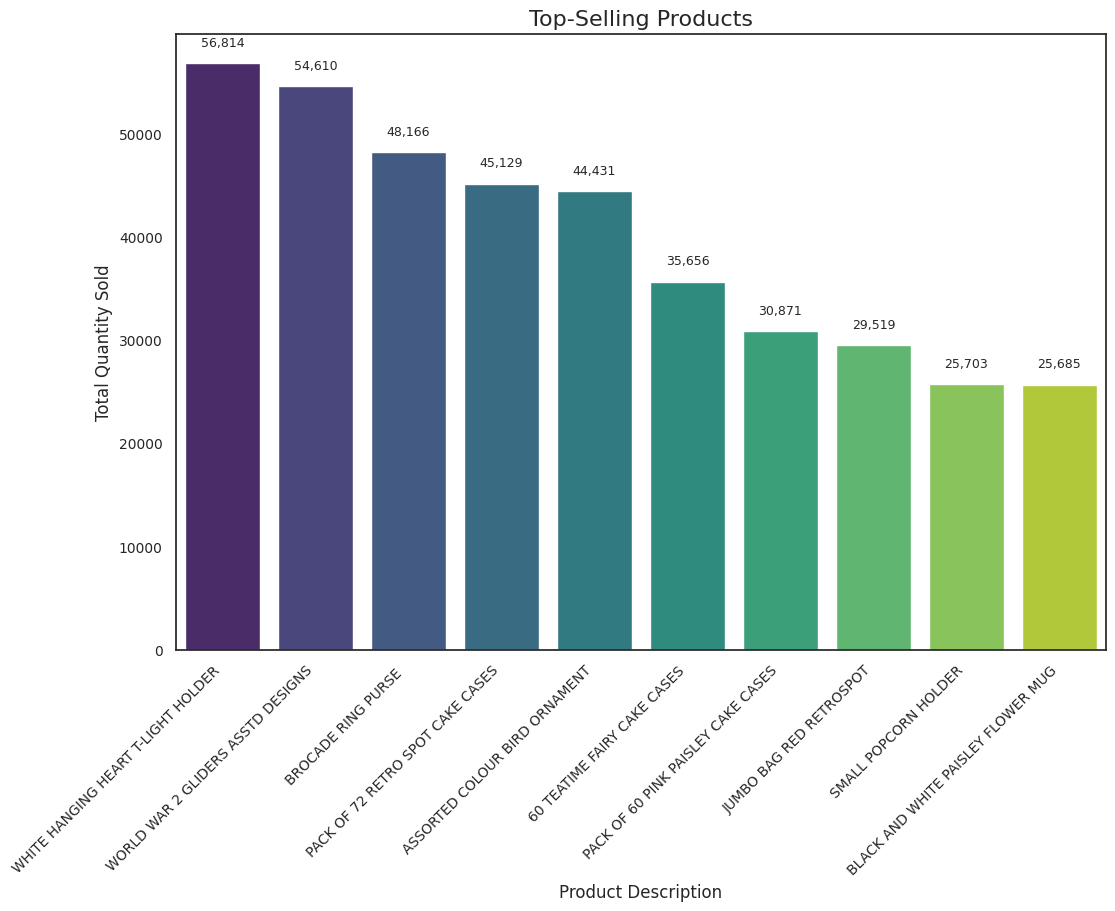

In [31]:
top_selling_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
ax = sns.barplot(x=top_selling_products.index, y=top_selling_products.values, palette="viridis")

plt.title('Top-Selling Products', fontsize=16)
plt.xlabel('Product Description', fontsize=12)
plt.ylabel('Total Quantity Sold', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

for p in ax.patches:
    ax.annotate(format(p.get_height(), ',.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 10),
                textcoords='offset points', fontsize=9)

plt.show()

The 'WHITE HANGING HEART T-LIGHT HOLDER' emerges as the best-selling item, with the highest total sales quantity, suggesting it is either highly popular or frequently featured in sales promotions.

### Advanced Visual Analysis



#### Date-Time Analysis

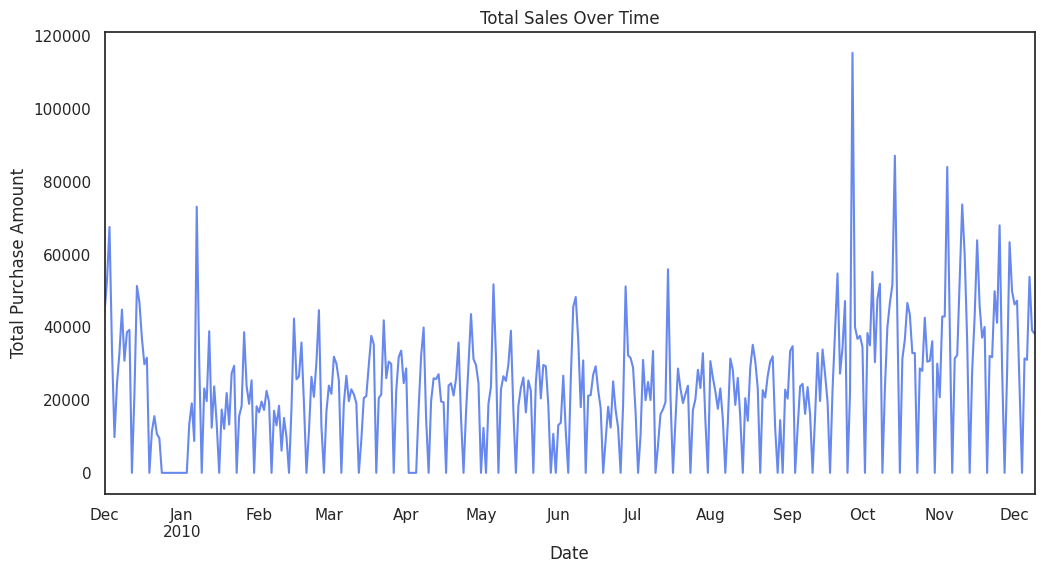

In [36]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.set_index('InvoiceDate', inplace=True)
total_sales_by_date = df['Total Purchase'].resample('D').sum()

plt.figure(figsize=(12, 6))
total_sales_by_date.plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Purchase Amount')
plt.show()

- Sales Trends and Seasonality: The observed spikes in sales are likely due to specific events or promotions. There is a clear trend of sales growth throughout the year, culminating in a significant increase towards the year-end, particularly during major shopping events like Black Friday, Cyber Monday, and Christmas.

- Business Implications: These seasonal trends are crucial for effective inventory management and planning targeted marketing campaigns. By anticipating and preparing for the year-end sales surge, businesses can optimize staffing, ensure adequate stock levels, and enhance promotional strategies to maximize revenue during peak periods.

In [37]:
df.reset_index(inplace=True)

In [38]:
df_data = df.copy()

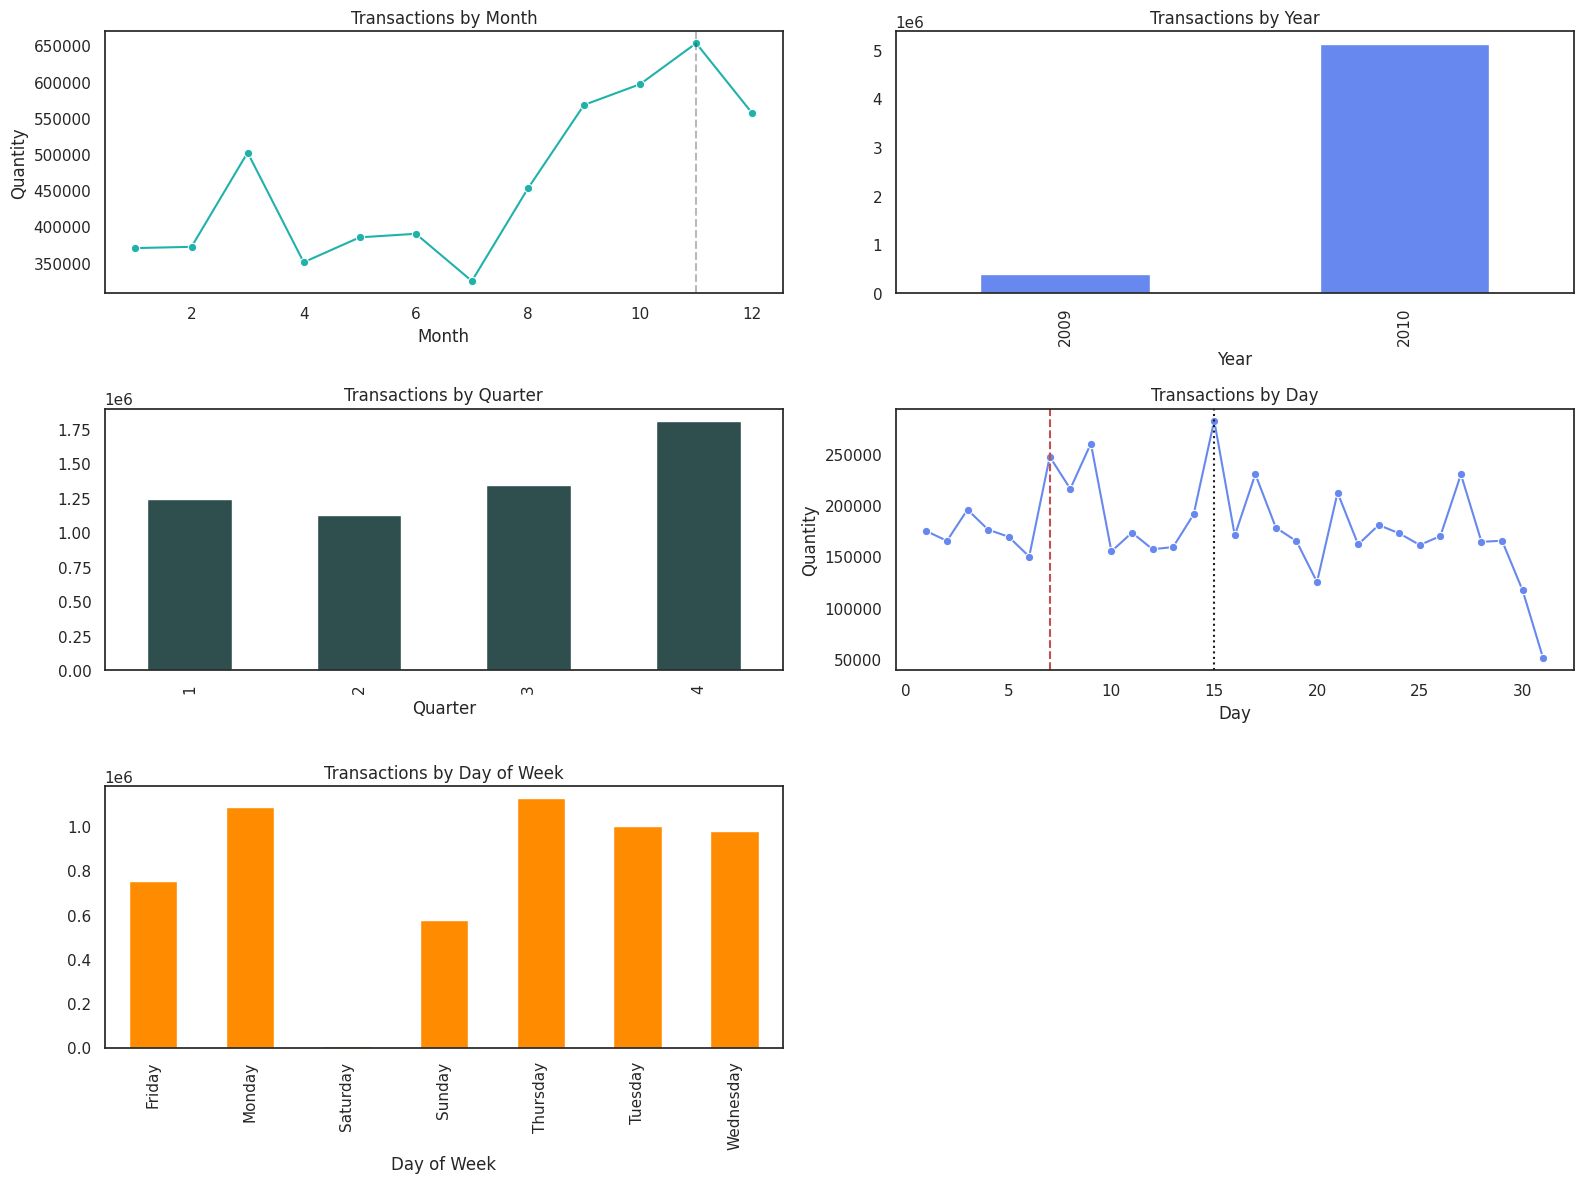

In [39]:
df_data.loc[:, "Month"] = df.InvoiceDate.dt.month
df_data.loc[:, "Time"] = df.InvoiceDate.dt.time
df_data.loc[:, "Year"] = df.InvoiceDate.dt.year
df_data.loc[:, "Day"] = df.InvoiceDate.dt.day
df_data.loc[:, "Quarter"] = df.InvoiceDate.dt.quarter
df_data.loc[:, "Day of Week"] = df.InvoiceDate.dt.dayofweek

#Mapping day of week
dayofweek_mapping = dict({0: "Monday",
                         1: "Tuesday",
                         2: "Wednesday" ,
                         3: "Thursday",
                         4: "Friday",
                         5: "Saturday",
                         6: "Sunday"})

df_data["Day of Week"] = df_data["Day of Week"].map(dayofweek_mapping)

plt.figure(figsize=(16,12))
plt.subplot(3,2,1)
sns.lineplot(x = "Month", y = "Quantity", data = df_data.groupby("Month").sum("Quantity"), marker = "o", color = "lightseagreen")
plt.axvline(11, color = "k", linestyle = '--', alpha = 0.3)
plt.title("Transactions by Month")

plt.subplot(3,2,2)
df_data.groupby("Year")["Quantity"].sum().plot(kind = "bar")
plt.title("Transactions by Year")

plt.subplot(3,2,3)
df_data.groupby("Quarter")["Quantity"].sum().plot(kind = "bar", color = "darkslategrey")
plt.title("Transactions by Quarter")

plt.subplot(3,2,4)
sns.lineplot(x = "Day", y = "Quantity", data = df_data.groupby("Day").sum("Quantity"), marker = "o", )
plt.axvline(7, color = 'r', linestyle = '--')
plt.axvline(15, color = 'k', linestyle = "dotted")
plt.title("Transactions by Day")

plt.subplot(3,2,5)
df_data.groupby("Day of Week")["Quantity"].sum().plot(kind = "bar", color = "darkorange")
plt.title("Transactions by Day of Week")
plt.tight_layout()
plt.show()

- Peak Sales in October: The graph shows a significant peak in transactions during October, suggesting a strong seasonal influence, likely due to holiday shopping or promotions. This is also observed as transactions peak in the fourth quarter.      
- Weekday Patterns: Transaction volume is higher on weekdays, with Thursday being the busiest, and drops significantly on Saturday, indicating less commercial activity on weekends.


In [40]:
print("Total Number of Countries in 2009: {}".format(len(df_data[df_data["Year"] == 2009]["Country"].unique())))
print("Total Number of Transactions in 2009: {}".format(df_data[df_data["Year"] == 2009]["Quantity"].sum()))
print("--------------------------------------------")
print("Total Number of Countries in 2010: {}".format(len(df_data[df_data["Year"] == 2010]["Country"].unique())))
print("Total Number of Transactions in 2010: {}".format(df_data[df_data["Year"] == 2010]["Quantity"].sum()))
print("--------------------------------------------")

Total Number of Countries in 2009: 22
Total Number of Transactions in 2009: 398708
--------------------------------------------
Total Number of Countries in 2010: 37
Total Number of Transactions in 2010: 5121740
--------------------------------------------


- The business has expanded to more countries in the year 2010 compared to 2009.

#### Top Revenue Generating Products

In [41]:
category_sales = df.groupby('Description')['Total Purchase'].sum().sort_values(ascending=False)
top_n_categories = category_sales.head(10)
print(top_n_categories)

Description
WHITE HANGING HEART T-LIGHT HOLDER     151339.16
REGENCY CAKESTAND 3 TIER               143727.60
Manual                                  98531.99
ASSORTED COLOUR BIRD ORNAMENT           70291.03
JUMBO BAG RED RETROSPOT                 51644.25
POSTAGE                                 48741.08
ROTATING SILVER ANGELS T-LIGHT HLDR     40156.05
PAPER CHAIN KIT 50'S CHRISTMAS          36871.55
PARTY BUNTING                           35017.30
EDWARDIAN PARASOL NATURAL               34044.75
Name: Total Purchase, dtype: float64


<Axes: ylabel='Description'>

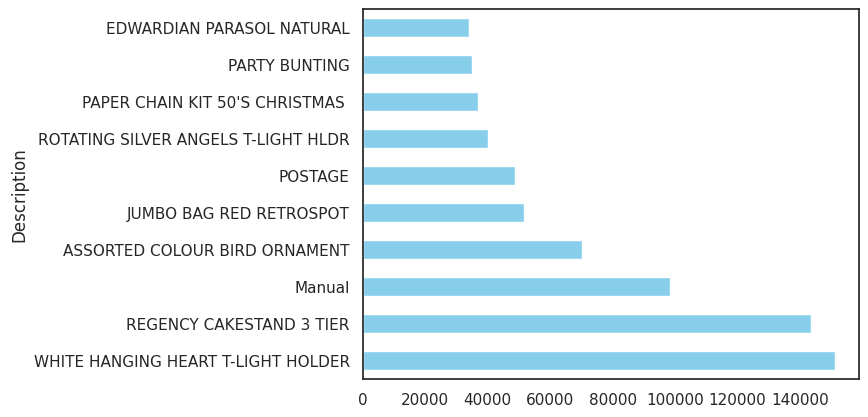

In [42]:
top_n_categories.plot(kind='barh', color='skyblue')